# Лабораторная работа №2

ФИО: Коншин Кирилл Павлович

Группа: БИВТ-21-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv", sep=',', index_col = 'Person ID')  # если нужно, можно поменять разделитель

## 2. Описание постановки задачи

In [ ]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [ ]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

Целевая переменная -- Sleep Disorder. Имеет три значения, показаные выше. Всего атрибутов у объекта -- 12. Целевое событие, которое надо предсказать -- набор из 3-х классов

## 3. Распределение целевой переменной

Number of unique values in 'Sleep Disorder': 3


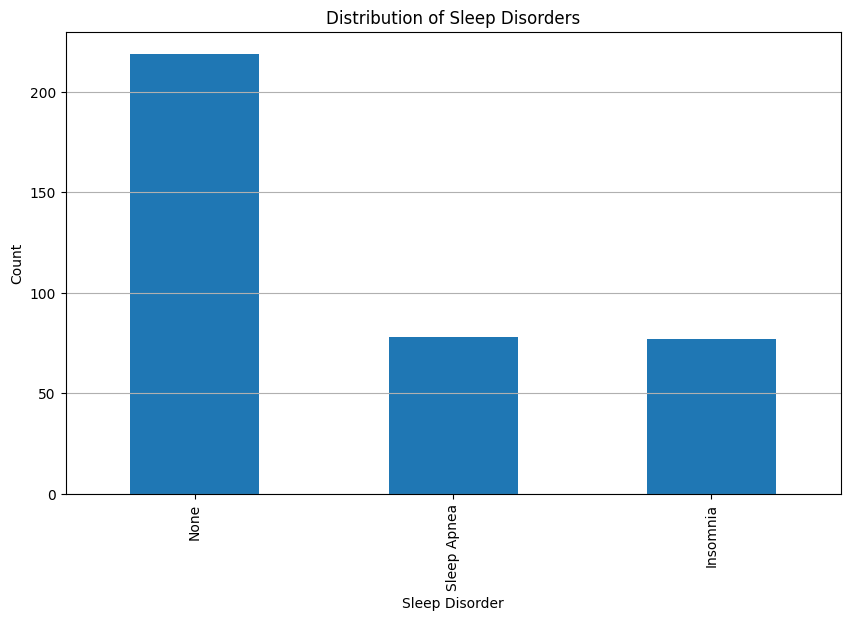

In [ ]:
df['Sleep Disorder'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.grid(axis='y')

unique_values_count = df['Sleep Disorder'].nunique()
print(f"Number of unique values in 'Sleep Disorder': {unique_values_count}")


plt.show()

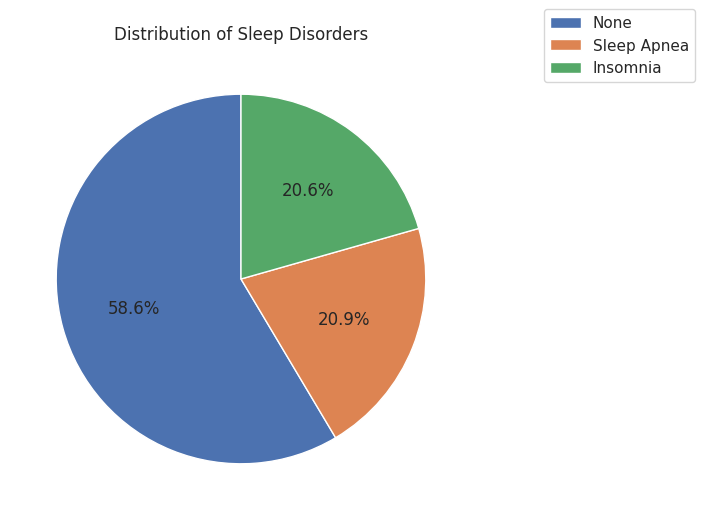

In [ ]:
df['Sleep Disorder'].value_counts().plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', startangle=90, labels=None)
plt.title('Distribution of Sleep Disorders')
plt.ylabel('')
plt.legend(df['Sleep Disorder'].unique(), loc='upper right', bbox_to_anchor=(1.5, 1.1))
plt.show()

## 4. Основные статистики датасета


In [ ]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## 5. Основная информация о датасете



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


## 6. Основная информация о пропусках в датасете



In [ ]:
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Пропусков не обнаружено.

Что касается замены пропусков в общем случае:

- Пропуски можно заменить средним значением, медианой или модой для числовых переменных, интерполяция и экстраполяция.
- Для категориальных переменных пропуски можно заменить на наиболее часто встречающееся значение.
- В зависимости от контекста и объема пропусков также можно принять решение об исключении соответствующих строк или столбцов из анализа.

## 7. Гистограммы распределения признаков



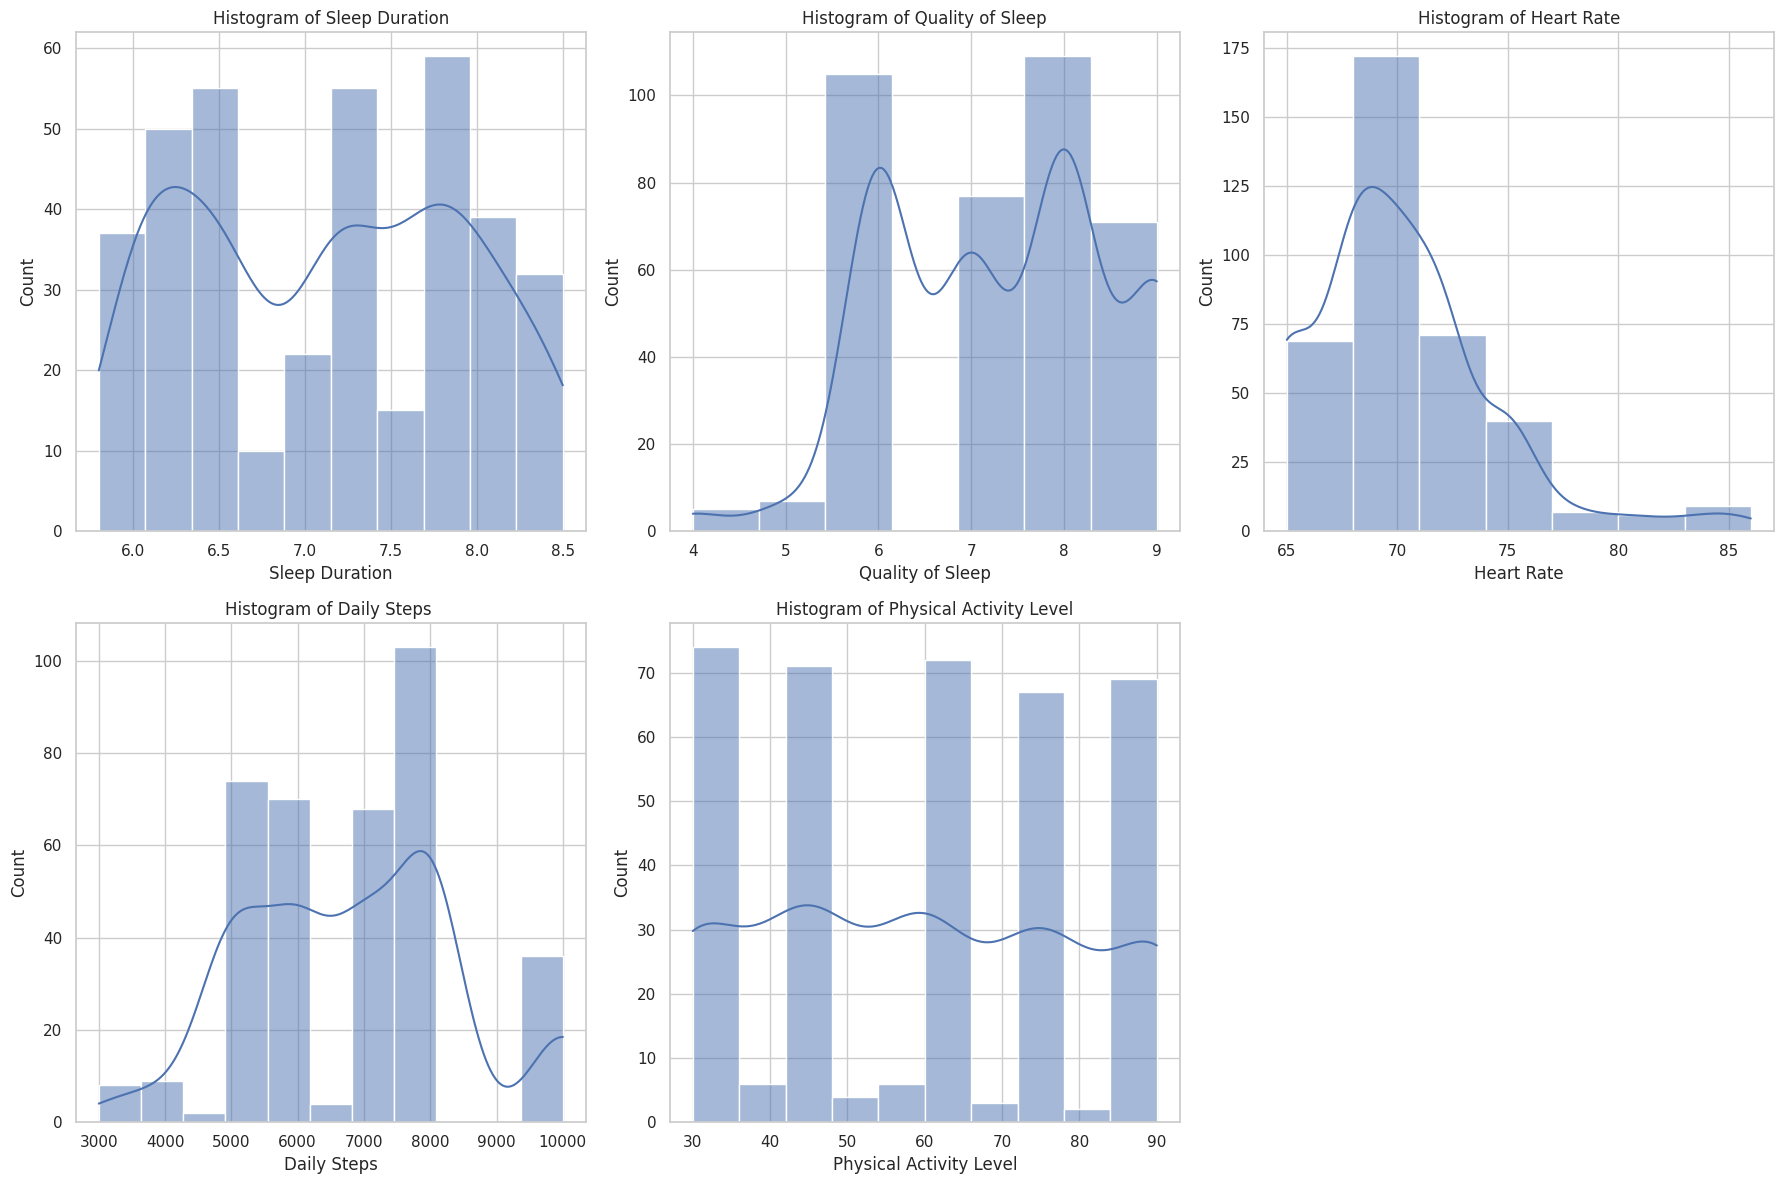

In [ ]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(18, 12))


plt.subplot(2, 3, 1)
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Histogram of Sleep Duration')

plt.subplot(2, 3, 2)
sns.histplot(df['Quality of Sleep'], kde=True, bins = 7)
plt.title('Histogram of Quality of Sleep')

plt.subplot(2, 3, 3)
sns.histplot(df['Heart Rate'], kde=True, bins = 7)
plt.title('Histogram of Heart Rate')

plt.subplot(2, 3, 4)
sns.histplot(df['Daily Steps'], kde=True)
plt.title('Histogram of Daily Steps ')

plt.subplot(2, 3, 5)
sns.histplot(df['Physical Activity Level'], kde=True, bins = 10)
plt.title('Histogram of Physical Activity Level')

plt.tight_layout()
plt.show()

Из представленных графиков видно, что продолжительность сна и его качество обладают мультимодальным распределением. Этим можно сказать, что в исходной группе есть явные различия, и выборку можно разбить на несколько партиций (молодые, пенсионеры). График сердечного ритма показал примерно log-нормальное распределение, которое при необходимости можно ппривести к нормальному.

Количестов пройденных шагов можно также привести к бимодальному распределению и разбить выборку на две, также стоит учитывать характерный выброс в районее 10000 шагов, что показывает некую подгруппку спортсменов или физически активных людей

Схожий результат и с физической активностью

## 8.  Графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной



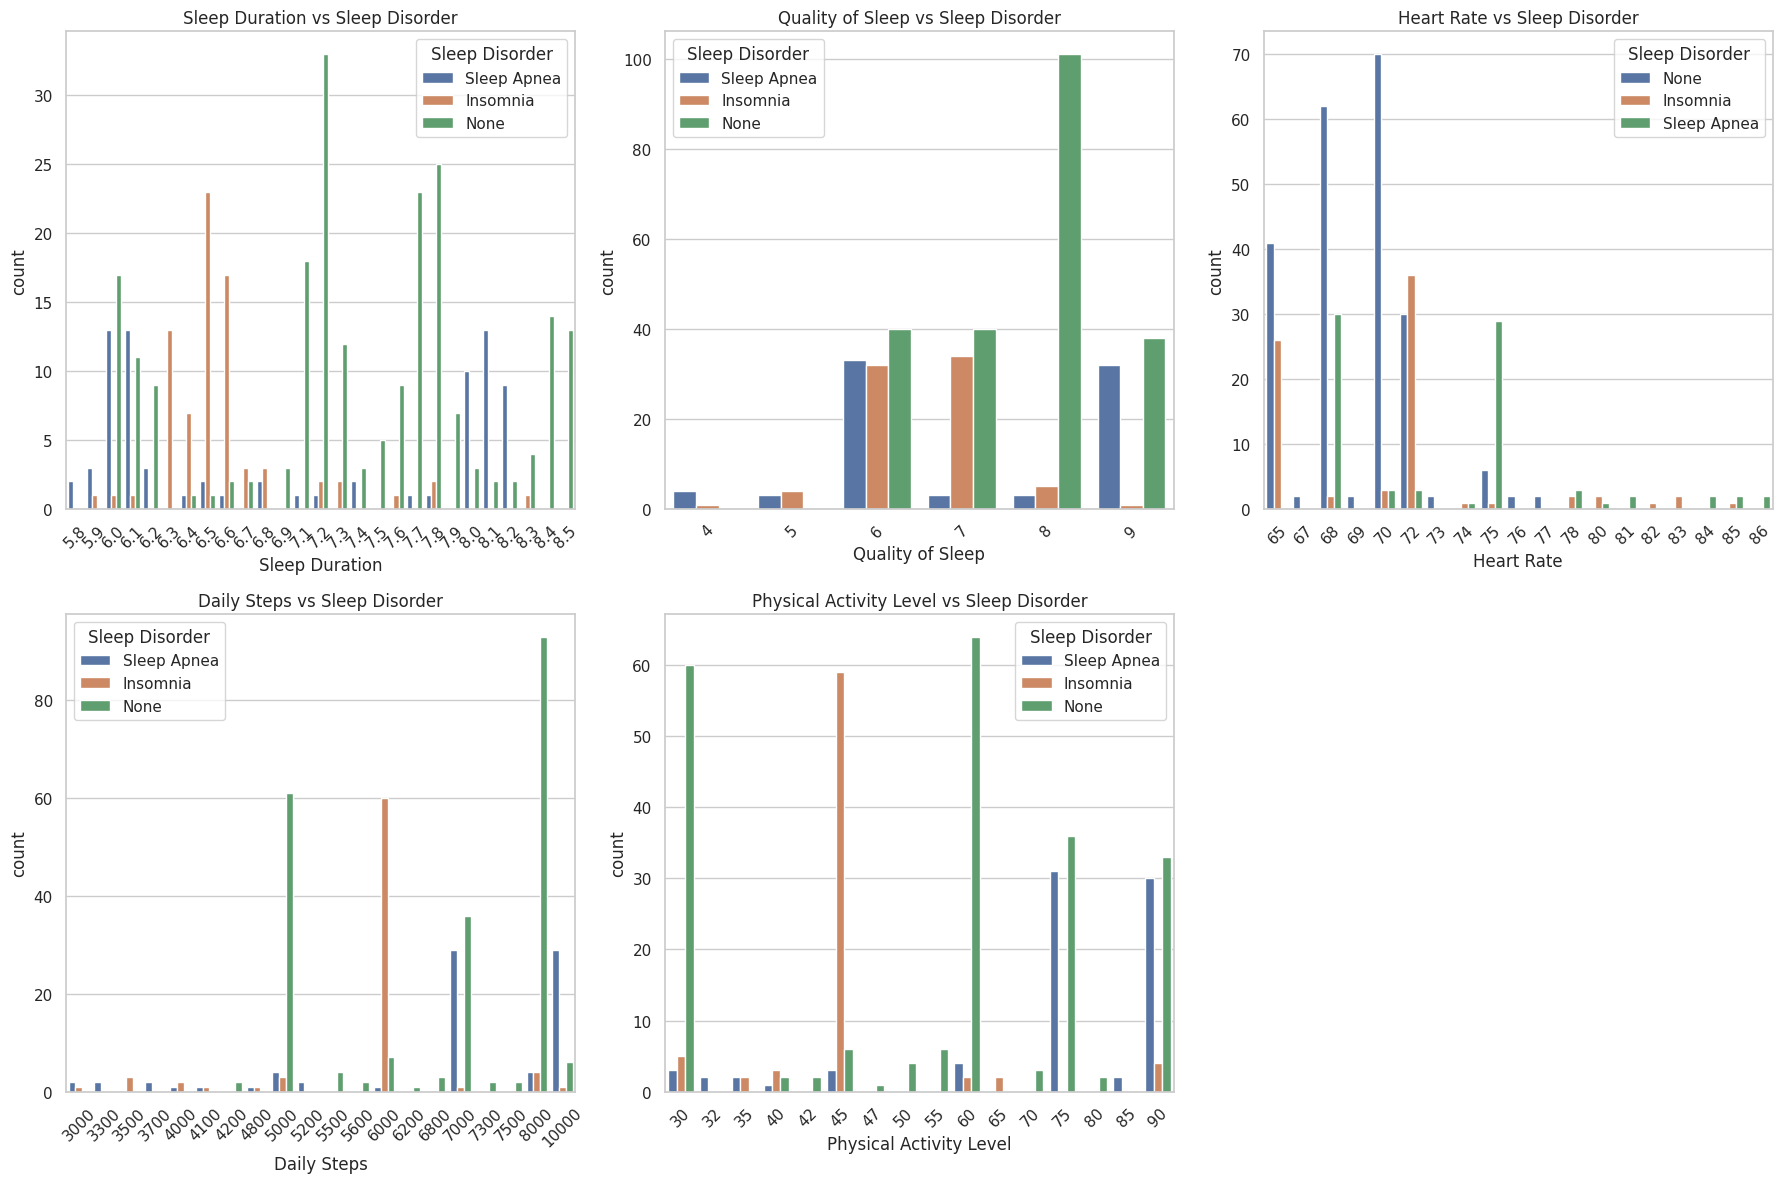

In [ ]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.countplot(x='Sleep Duration', hue='Sleep Disorder', data=df)
plt.title('Sleep Duration vs Sleep Disorder')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.countplot(x='Quality of Sleep', hue='Sleep Disorder', data=df)
plt.title('Quality of Sleep vs Sleep Disorder')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.countplot(x='Heart Rate', hue='Sleep Disorder', data=df)
plt.title('Heart Rate vs Sleep Disorder')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.countplot(x='Daily Steps', hue='Sleep Disorder', data=df)
plt.title('Daily Steps vs Sleep Disorder')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.countplot(x='Physical Activity Level', hue='Sleep Disorder', data=df)
plt.title('Physical Activity Level vs Sleep Disorder')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

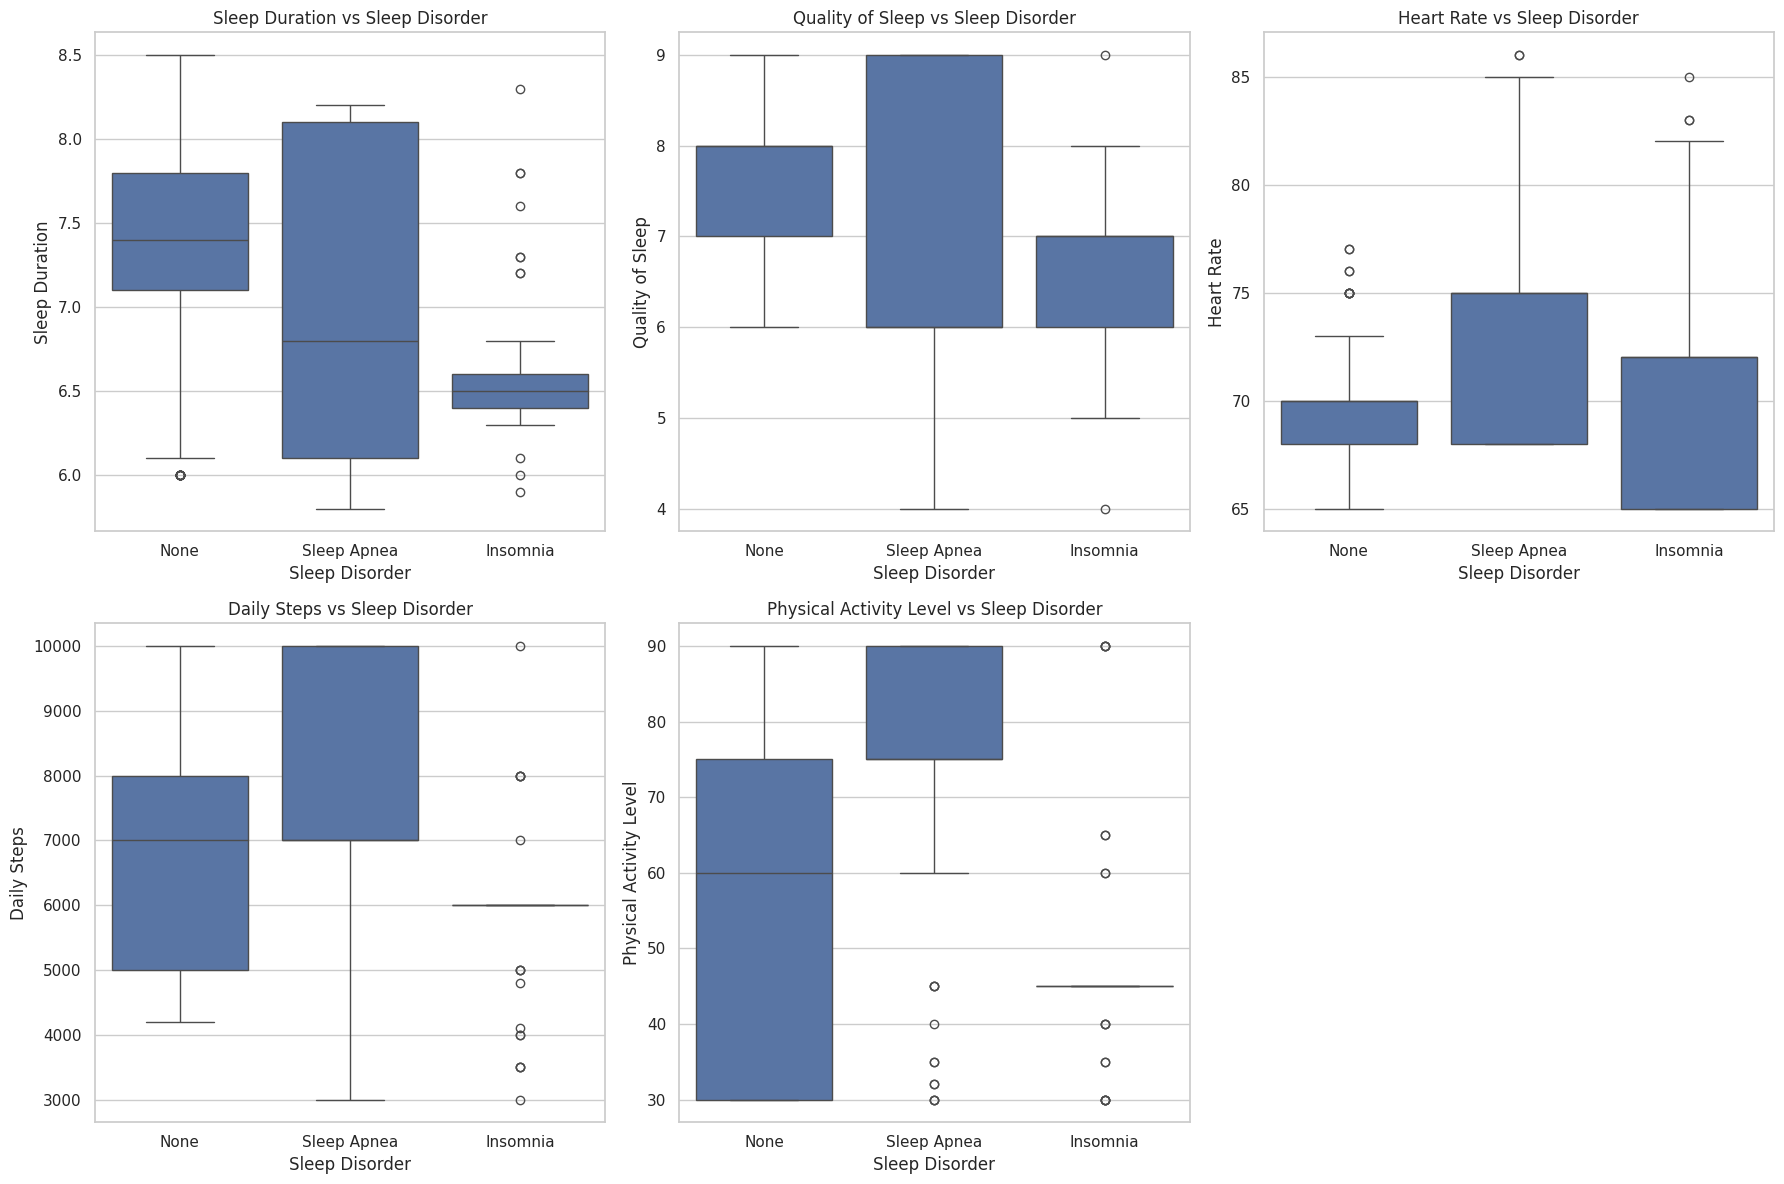

In [ ]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df)
plt.title('Sleep Duration vs Sleep Disorder')

plt.subplot(2, 3, 2)
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=df)
plt.title('Quality of Sleep vs Sleep Disorder')

plt.subplot(2, 3, 3)
sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df)
plt.title('Heart Rate vs Sleep Disorder')

plt.subplot(2, 3, 4)
sns.boxplot(x='Sleep Disorder', y='Daily Steps', data=df)
plt.title('Daily Steps vs Sleep Disorder')

plt.subplot(2, 3, 5)
sns.boxplot(x='Sleep Disorder', y='Physical Activity Level', data=df)
plt.title('Physical Activity Level vs Sleep Disorder')

plt.tight_layout()
plt.show()

Из представленных графиков видно, при низкой продолжительности сна, его качестве, а также малом количетсве шагов, риск получения бессоницы возрастает.


При низкой продолжительности сна, низком сердечном ритме, а также высокой физической активности может наблюдаться апноэ во сне.


При прохождении большого количества шагов за день, хорошем качестве и продолжительности сна шанс избежания проблем со сном возрастает.